### Read Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

100%|██████████| 286k/286k [00:00<00:00, 57.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


 ### *** Data Desc. ***
==========================================
Bike Sharing Dataset
==========================================

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


=========================================
Background
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

=========================================
Associated tasks
=========================================

	- Regression:
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.

	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days


=========================================
Dataset characteristics
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================

For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
!ls  /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


day.csv  hour.csv  Readme.txt


In [ ]:

df_day =pd.read_csv('/root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_hour = pd.read_csv('/root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Count & Registered

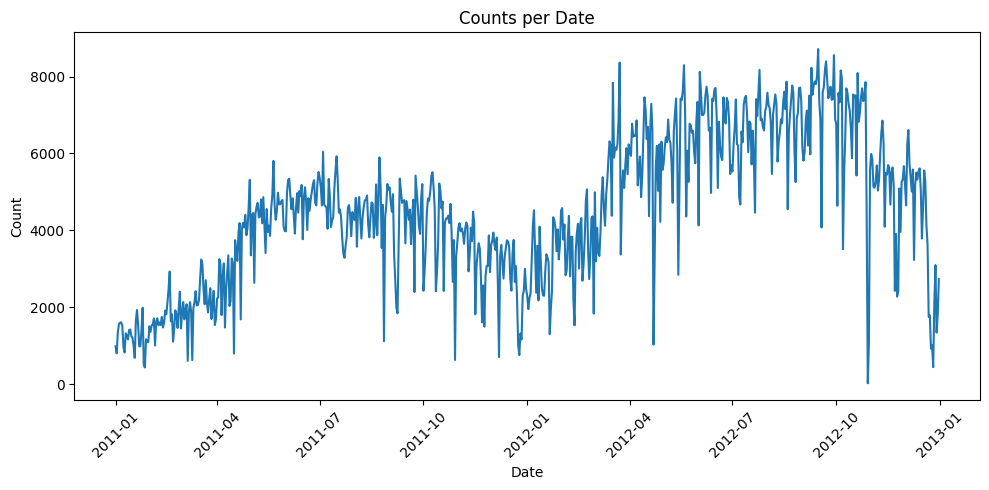

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Count occurrences per date
# date_counts = df['date_column'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_day['dteday'],df_day['cnt'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Counts per Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

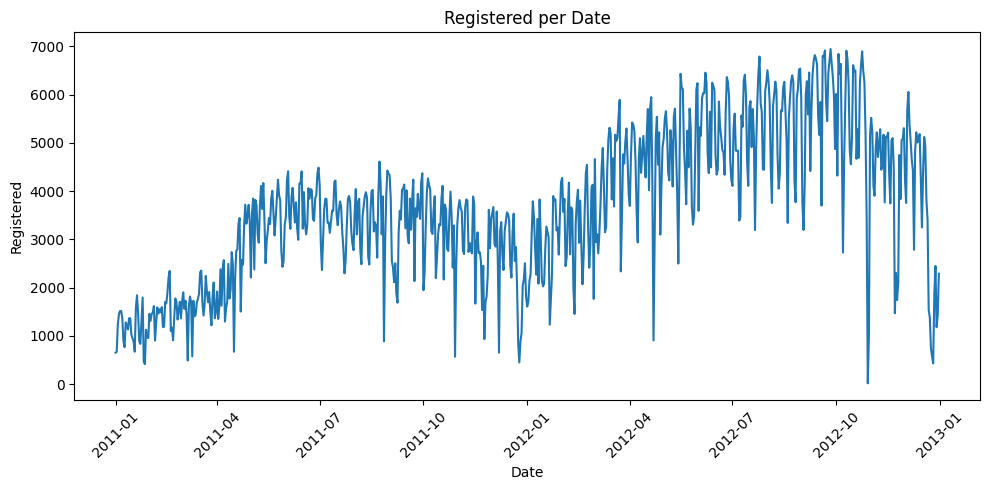

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_day['dteday'],df_day['registered'])
plt.xlabel('Date')
plt.ylabel('Registered')
plt.title('Registered per Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

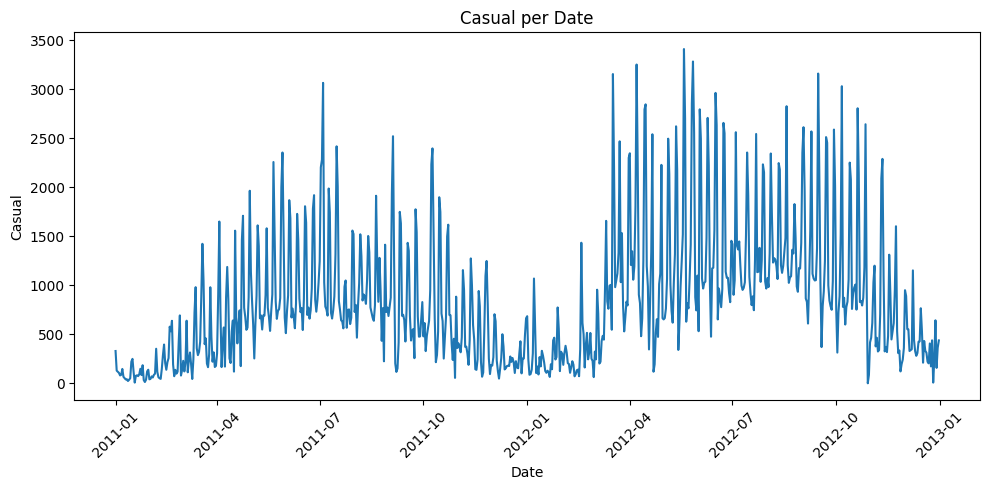

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_day['dteday'],df_day['casual'])
plt.xlabel('Date')
plt.ylabel('Casual')
plt.title('Casual per Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

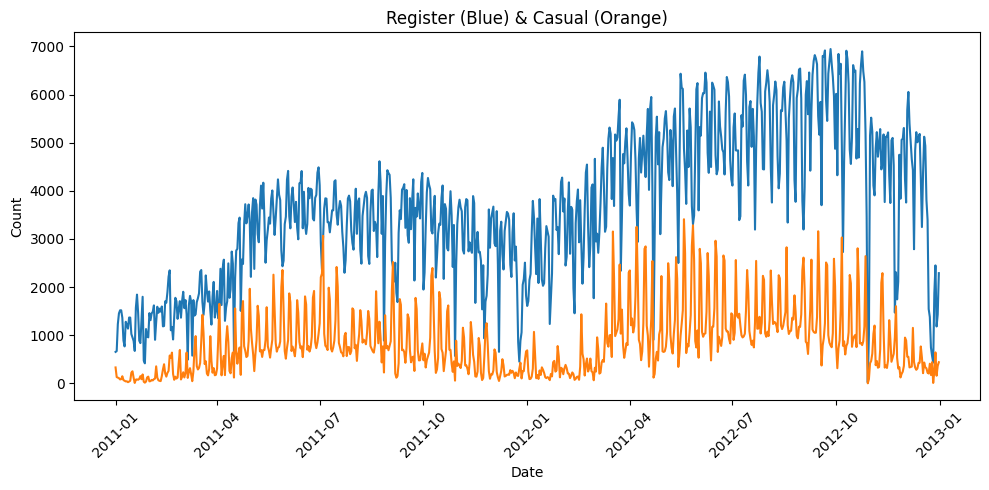

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_day['dteday'],df_day['registered'])
plt.plot(df_day['dteday'],df_day['casual'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Register (Blue) & Casual (Orange)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Temp & Hum & Windespeed

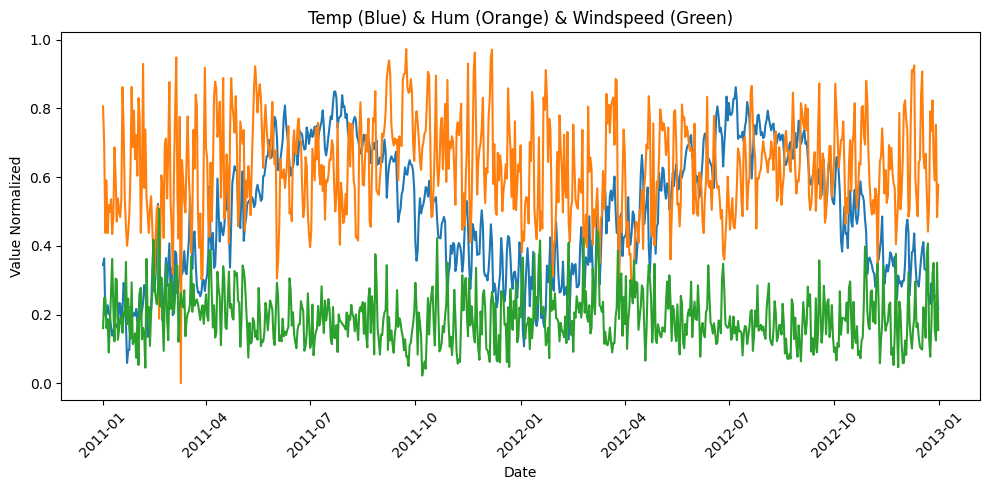

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_day['dteday'],df_day['temp'])
plt.plot(df_day['dteday'],df_day['hum'])
plt.plot(df_day['dteday'],df_day['windspeed'])
plt.xlabel('Date')
plt.ylabel('Value Normalized')
plt.title('Temp (Blue) & Hum (Orange) & Windspeed (Green)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Season

Q1 : Does Season affect count ?

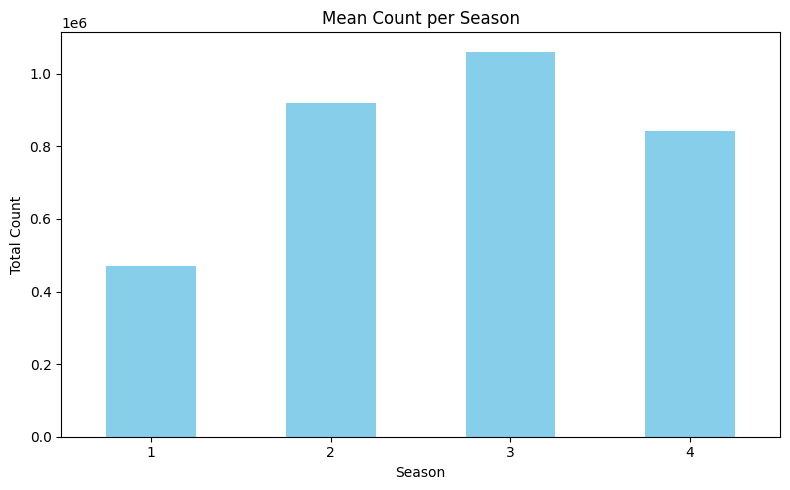

In [ ]:
grouped_data = df_day.groupby('season')['cnt'].sum()

# Plot
grouped_data.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.xlabel('Season')
plt.ylabel('Total Count')
plt.title('Mean Count per Season')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Ans: Well, yes, mostly on 3rd season which is fall. At fall, they have amazing holidays https://wildcatchronicle.org/8925/uncategorized/fall-is-a-time-to-enjoy-the-outdoors-and-important-holidays/

### Weekday & Holiday & Working day

Q2: Does weekday affect count ?

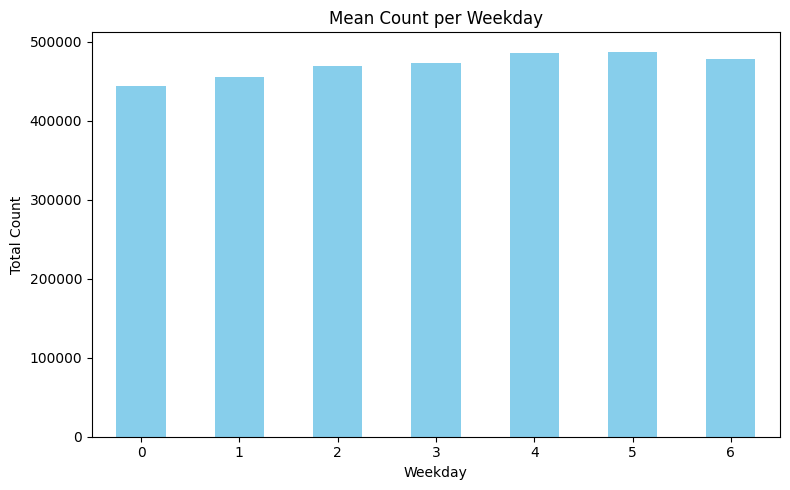

In [ ]:
grouped_data = df_day.groupby('weekday')['cnt'].sum()

# Plot
grouped_data.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Total Count')
plt.title('Mean Count per Weekday')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Ans: Well there is, but it doesnt seems much a difference

Q3: Does holiday affect count ?

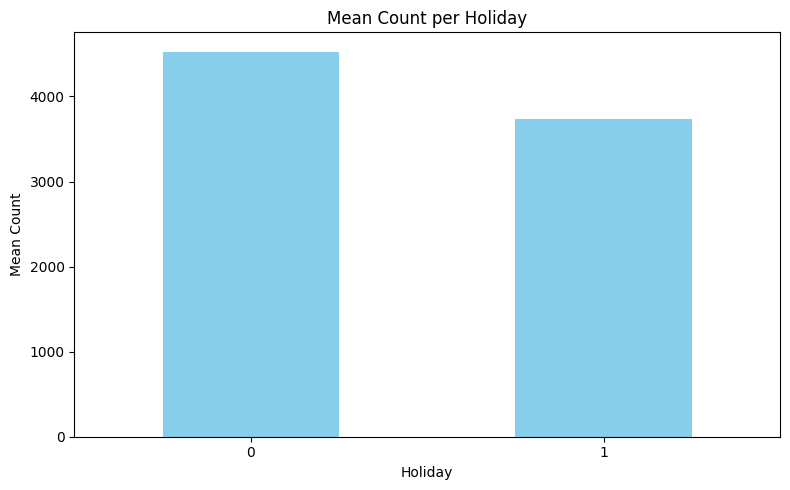

In [ ]:
grouped_data = df_day.groupby('holiday')['cnt'].mean()

# Plot
grouped_data.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.xlabel('Holiday')
plt.ylabel('Mean Count')
plt.title('Mean Count per Holiday')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Well, No, regardless it was holiday or not, people still renting the bike

Q4: Does people still went to rent a bike even when it's working day ?

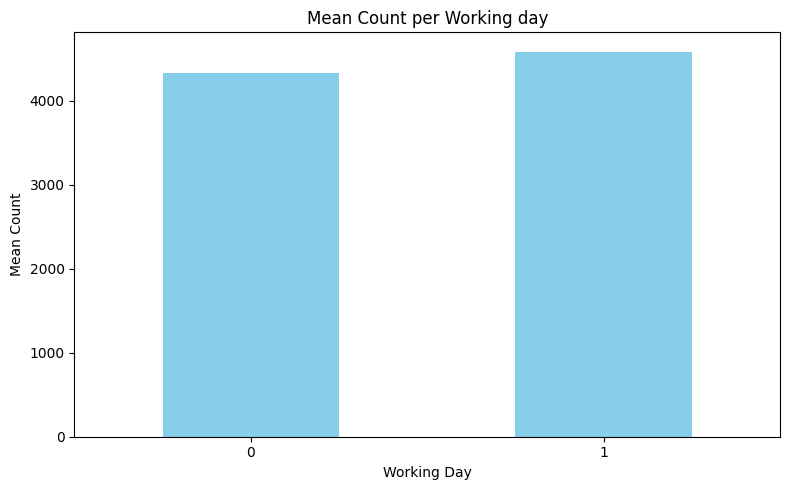

In [48]:
grouped_data = df_day.groupby('workingday')['cnt'].mean()

# Plot
grouped_data.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.xlabel('Working Day')
plt.ylabel('Mean Count')
plt.title('Mean Count per Working day')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Ans : Yes, they still went to rent the bike

### 2011 vs 2012 Count

Q5: Is there a trend between 2012 and 2011 rent counts ?

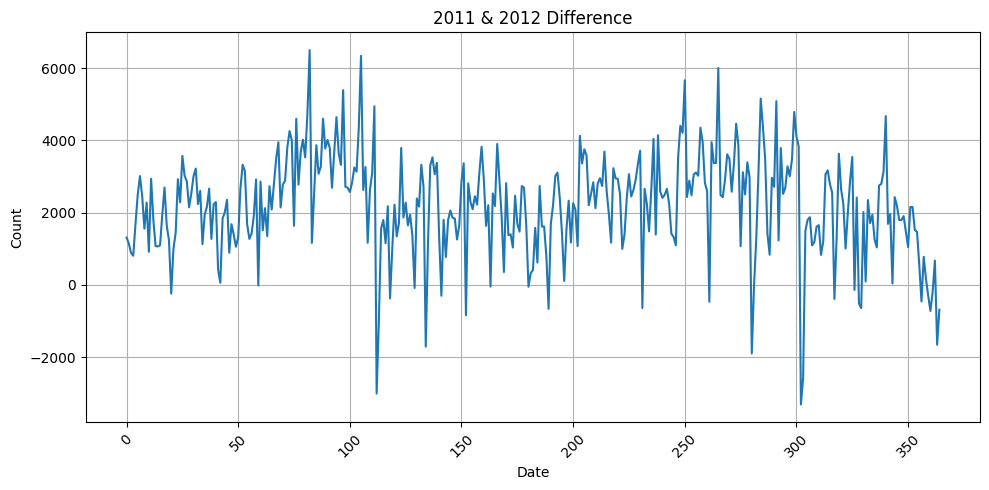

In [45]:
# Plot
# Filter data by year
df_2011 = df_day[df_day['dteday'].dt.year == 2011]
df_2012 = df_day[df_day['dteday'].dt.year == 2012]


plt.figure(figsize=(10, 5))
plt.plot([x for x in range(365)],df_2012['cnt'][:-1].values - df_2011['cnt'].values )
# plt.axline((0,0),(0,0))
plt.grid()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('2011 & 2012 Difference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
print(f"Mean Difference 2012 & 2011 : {(df_2012['cnt'][:-1].values - df_2011['cnt'].values).mean()}")

Mean Difference 2012 & 2011 : 2202.0383561643835


Ans: well yes, there were trends going up between each day in 2012 and 2011.